# 稳定性

时间序列的 **稳定性（Stationary）**，或称平稳性，是时间序列研究中的一个重要概念。正如我们最基础的线性回归对误差做了独立同正态分布的假设、线性回归才能进行有效的方差分析类似，时间序列的研究也往往需要借助一些假设。通常，这个假设就是与稳定性有关的。

## 严格稳定与弱稳定

稳定性分为两种：严格稳定与弱稳定。下面来看一下它们的定义。首先是严格稳定：

<div class="alert alert-info">

**定义（严格稳定）：** 

如果一个随机过程 $(X_t: t\in T)$ 对 $t_1, t_2, \ldots, t_n\in T$ 以及满足 $t_1+h, t_2+h, \ldots, t_n+h\in T$ 的常数 $h$，都有以下成立（其中 $\overset{D}{=}$ 表示同分布）：

\begin{equation*}
(X_{t_1}, X_{t_2}, \ldots, X_{t_n}) \overset{D}{=} (X_{t_1+h}, X_{t_2+h}, \ldots, X_{t_n+h}),
\end{equation*}

换言之，该过程中有限维度的分布具有时移不变性。那么，该随机过程是**严格稳定的（Strict Stationary）**。

</div>

严格稳定从定义上来说，其证明往往需要依赖“独立同分布”的假设。这个假设在现实中往往过强了；因此我们往往将条件放宽，围绕弱稳定进行讨论。弱稳定的定义如下：

<div class="alert alert-info">

**定义（弱稳定；自协方差；自相关）：** 

如果一个随机过程 $(X_t: t\in T)$ 满足以下所有条件：

1. 具有常数均值：$E(X_t) = m, t\in T$
2. 具有有限的二阶矩：$E(X_t^2) < \infty, t\in T$. 
3. $X_t$ 与 $X_{t+h}$ 的协方差，记为 $\gamma_X(h)$，不依赖于 $t$ 而只取决于 $h$：
    
    \begin{equation*}\gamma_X(h) = Cov(X_t, X_{t+h}).\end{equation*}

那么，该随机过程是**弱稳定的（Weak Stationary）**。其中，$\gamma_X(h)$，称为该随机过程 $(X_t: t\in h)$ 的**自协方差函数（Autocovariance Function, ACVF）**，简记为 $\gamma(h)$。自协方差函数与 $\gamma(0)$ 的比值：

\begin{equation*}
\rho_X(h) = \frac{\gamma_X(h)}{\gamma_X(0)}, 
\end{equation*}

称为**自相关函数（Autocorrelation Function, ACF）**。

</div>

读者可以将自相关函数，与随机变量的相关系数（correlation）定义进行比对：

$$ Corr(X, Y) = \frac{Cov(X, Y)}{\sqrt{Var(X)Var(Y)}} = \frac{E\big[ (X - EX)(Y - EY) \big]}{\sqrt{Var(X)Var(Y)}}.$$

最后，是两种稳定性的性质：

- 严格稳定的随机过程一定也是弱稳定的。反之则不然。
- 如果一个弱稳定随机过程是高斯的（Gaussian），那么它也是严格稳定的。高斯随机过程是指：对任意 $t_1, t_2, \ldots, t_n\in T$，都有其对应的随机向量 $(X_{t_1}, X_{t_2}, \ldots, X_{t_n})$ 服从联合正态分布。

## 样本自协方差/自相关函数

在实际应用中，理论的自协方差与自相关是无法求得的，因为我们只有对诸随机变量 $(X_t)$ 的观测值 $(x_t)$。对于 $x_1, x_2, \ldots, x_n$，我们可以用**样本自协方差函数（Sample Autocovariance Function, Sample ACVF）**进行估计：

\begin{equation}\label{eq:sacvf}
\hat{\gamma}(h) = \frac{1}{n}\sum_{t=1}^{n-h} (x_{t+h} - \bar{x})(x_t - \bar{x}), \quad h=0,1,\ldots,n-1.
\end{equation}

其中 $\bar{x}=\frac{1}{n}\sum_{t=1}^n x_t$ 。最后，我们可以得到**样本自相关函数（Sample Autocorrelation Function, Sample ACF）**：

\begin{equation*}
\hat{\rho}(h) = \frac{\hat{\rho}(h)}{\hat{\rho}(0)}, \quad h=0,1,\ldots,n-1. 
\end{equation*}

一些注解：

- 在式 $\eqref{eq:sacvf}$ 中，求平均的分母采用 $n$ 而不是 $n - h$，是因为前者保留了一些方便的性质。这一点会在后续章节中谈到。
- 在计算样本自协方差函数时，我们往往不会将 $h$ 取得太接近 $n$，以避免对过少的样本进行求和计算。

在 R 中，绘制样本自相关函数的方法非常简单：

In [1]:
# This cell is hidden by nbsphinx.
#   Jupyter's R support on figure size. Usage:
#   options(repr.plot.width=..., repr.plot.height=...)
options(warn=-1)
library(repr)

options(repr.plot.width=8, repr.plot.height=4)

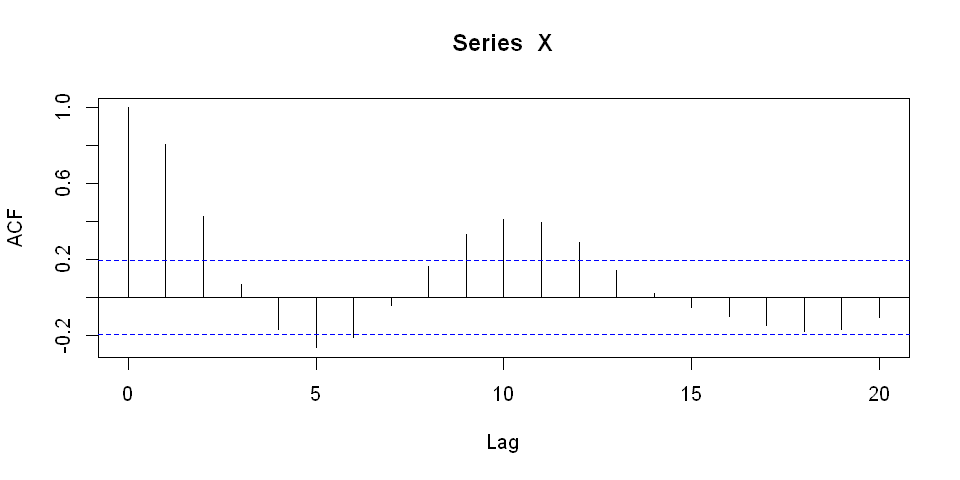

In [2]:
X = read.table('data/sunspots.txt', header=TRUE)$X
acf(X)

**样本自相关函数图像是时间序列分析的重要图像之一**，请读者务必注意。本例的样本自相关图像呈现正弦衰弱，也是一个典型的图像，我们在关于 ARMA 模型的章节会进行详细分析。

至于样本自协方差函数就复杂一些（因为并没有太大绘制的必要，只是一个分母 $\hat{\gamma}(0)$ 的倍数差别），我自己写了一个绘图函数 `plot.avcf()` 如下：

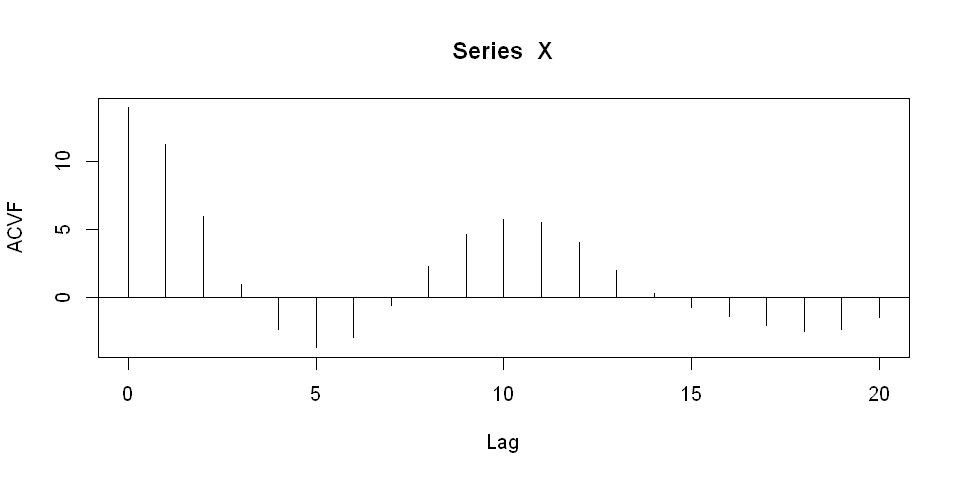

In [3]:
plot.acvf <- function(Y) {
    x.acf <- acf(Y, plot=FALSE)$acf
    x.acvf.zero <- var(Y) / length(Y)
    x.acvf <- x.acf * x.acvf.zero
    t <- seq(0, length(x.acvf) - 1)
    plot(t, x.acvf, type='h', main=paste('Series ', deparse(substitute(Y))),
         xlab='Lag', ylab='ACVF')
    abline(h=0)
}

plot.acvf(X)

## 与稳定性相关的随机过程

本小节介绍一些重要的、具有稳定性的随机过程。了解它们，将有助于后续章节的展开：

- 白噪声：弱稳定
- 随机漫步：不稳定

### 白噪声

一组实数取值的、两两不相关的、均值为0、方差为 $\sigma^2$ 的随机变量组成的随机过程 $(Z_t: t\in \mathbb{Z})$ ，它满足弱稳定的定义。这是因为：

- 它具有常数均值 $E(Z_t) = 0$.
- 它具有有限的二阶矩 $E(Z_t^2) = Var(Z_t) + E(Z_t)^2 = \sigma^2 < \infty$.
- 它的自协方差函数 $\gamma(h)$ 只取决于 $h$：

    \begin{equation*} \gamma(h) = \begin{cases} \sigma^2, & h = 0, \\ 0, & h \neq 0. \end{cases} \end{equation*}

我们也可以推得它的自相关函数 $\rho(h)$：

\begin{equation*}
\rho(h) = \begin{cases}
1, & h = 0, \\
0, & 0 \neq 0.
\end{cases}
\end{equation*}

这样的随机过程 $(Z_t: t\in \mathbb{Z})$ 称为 **白噪声（White Noise, WN）**。我们可以简记为 $Z_t \sim \mathrm{WN}(0, \sigma^2)$. 

白噪声的变量间约束并不是“独立同分布”，而是只是“不相关”。因此，白噪声不一定是严格稳定的。

### 随机漫步

基于在正整数时域上的白噪声 $(Z_t: t\in \mathbb{N})\sim \mathrm{WN}(0, \sigma^2)$，我们定义一个新的随机过程：

\begin{equation*}
R_t = \begin{cases} 0, & t = 0, \\
Z_1 + Z_2 + \ldots + Z_t, & t\in \mathbb{N}_+.
\end{cases}
\end{equation*}

这个随机过程 $(R_t: t\in \mathbb{N})$ 称为**随机漫步（Random Walk）**，是最重要的不稳定随机过程。它的不稳定性很容易推知：

\begin{equation*}
Cov(R_t, R_{t+h}) = Cov(R_t, R_t + (Z_{t+1} + Z_{t+2} + \cdots + Z_{t+h})) = t\sigma^2,
\end{equation*}

即它的自协方差函数是取决于 $t$ 的。